In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import inline as inline

%matplotlib inline

pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 23)
pd.set_option('display.max_rows', 121)

pd.options.mode.chained_assignment = None

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

df = pd.read_csv('events.csv', low_memory = False)


FileNotFoundError: File b'events.csv' does not exist

## Operating System durante los meses

In [9]:
df_osv = df.loc[df['operating_system_version'].notnull(), : ]
person_osv = df_osv[['person', ]]
df_osv = df_osv[['timestamp', 'operating_system_version','person']]
df_osv.head()
os = df_osv['operating_system_version'].value_counts()
s_os = os.nlargest(10)
os.describe()
os.head()
df_osv.describe()

,timestamp,operating_system_version,person
count,87378,87378,87378
unique,86556,121,26899
top,2018-05-15 23:53:09,Windows 7,6b07be7b
freq,3,19675,263


Obtenemos todos los usuarios que tienen algun tipo OS

In [4]:
os_per = df_osv.groupby('person')['operating_system_version'].nunique().value_counts()
os_per

1    25787
2      926
3      147
4       30
5        7
7        1
6        1
Name: operating_system_version, dtype: int64

In [5]:
person_osv.describe()

,person
count,87378
unique,26899
top,6b07be7b
freq,263


In [6]:
df_windows = df_osv.loc[df_osv['operating_system_version'].str.contains('Windows')]
df_ios = df_osv.loc[df_osv['operating_system_version'].str.contains('iOS')]
df_android = df_osv.loc[df_osv['operating_system_version'].str.contains('Android')]
df_mac = df_osv.loc[df_osv['operating_system_version'].str.contains('Mac')]
df_linux = df_osv.loc[df_osv['operating_system_version'].str.contains('Linux')]

df_windows['OS'] = 'Windows'
df_ios['OS'] = 'iOS'
df_android['OS'] = 'Android'
df_mac['OS'] = 'Mac'
df_linux

df_windows = df_windows[['timestamp','OS','person']]
df_ios = df_ios[['timestamp','OS','person']]
df_android = df_android[['timestamp','OS','person']]
df_mac = df_mac[['timestamp','OS','person']]




frames = [df_windows, df_ios, df_android, df_mac]
df_os = pd.concat(frames)

Separamos los operating system en las 4 categorias mas comunes hoy en dia (Android, Windows , iOS , OSx)

In [34]:
df_os['date'] = pd.to_datetime(df_os['timestamp'])
df_os['month'] = df_os['date'].dt.month
ct = pd.crosstab(df_os.month, df_os.OS)
ct.head(10)
ct


OS,Android,Mac,Windows,iOS
month,,,,
1,1055,1,959,117
2,1368,12,1304,99
3,3384,42,3515,286
4,5782,66,6324,411
5,18872,175,19177,1658
6,10949,110,10216,968


Text(67.25,0.5,'Mes')

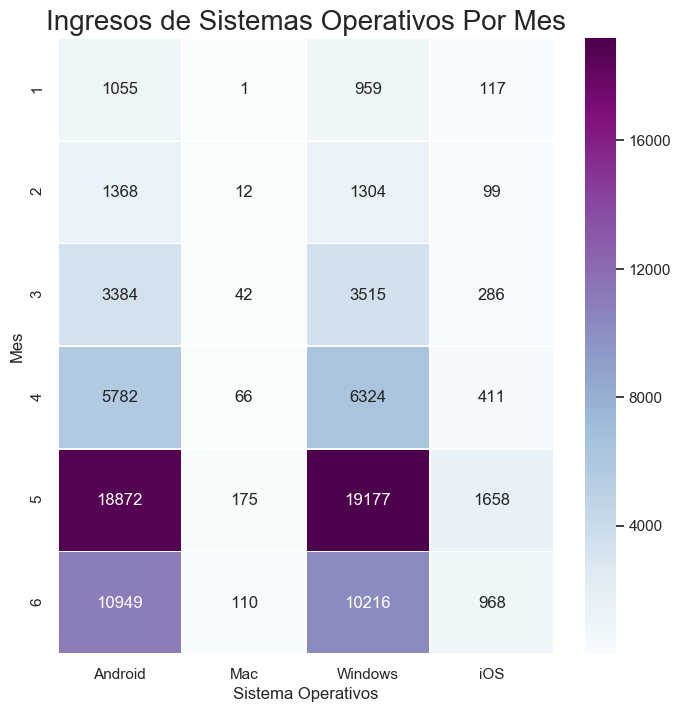

In [35]:
plt.subplots(figsize=(8,8))
grafico_dia_mes=sns.heatmap(ct,linewidths=.5,fmt="d",annot=True,cmap="BuPu")
grafico_dia_mes.set_title("Ingresos de Sistemas Operativos Por Mes",fontsize=20)
grafico_dia_mes.set_xlabel("Sistema Operativos",fontsize=12)
grafico_dia_mes.set_ylabel("Mes",fontsize=12)

Obtuvimos que el gran flujo de usuarios es proveniente de usuarios de Windows y Android 

Text(0,0.5,'Frecuencia')

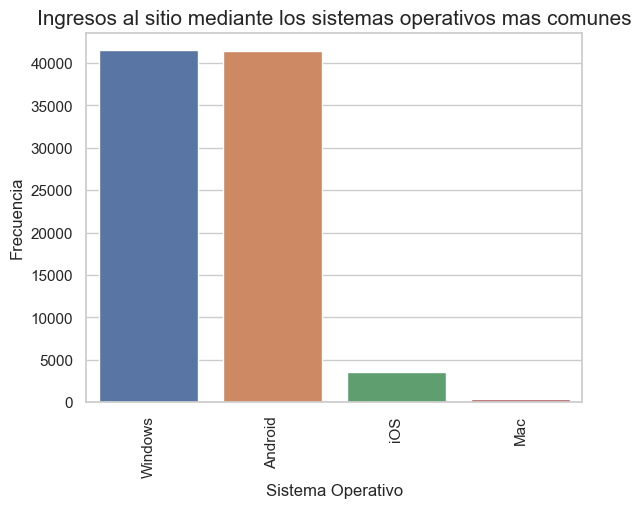

In [36]:
df_os['OS'].value_counts()
g = sns.barplot(x=df_os['OS'].value_counts().index, y=df_os['OS'].value_counts().values, orient = 'v')
plt.xticks(rotation=90)
g.set_title("Ingresos al sitio mediante los sistemas operativos mas comunes", fontsize = 15)
g.set_xlabel("Sistema Operativo", fontsize = 12)
g.set_ylabel("Frecuencia", fontsize = 12)

## Android

In [37]:
df_android_full= df[df['person'].isin(df_android['person'])]
df_android_viewed = df_android_full[df_android_full['event'] == 'viewed product']
top_10_models_viewed_android = df_android_viewed['model'].value_counts().head(10)
top_10_models_viewed_android


iPhone 6                  19007
iPhone 5s                 17182
iPhone 6S                 15611
Samsung Galaxy S7 Edge     9149
iPhone 7                   7820
Samsung Galaxy S7          6844
iPhone SE                  6256
iPhone 7 Plus              6100
Samsung Galaxy J5          5737
iPhone 6S Plus             5263
Name: model, dtype: int64

Text(0,0.5,'Frecuencia')

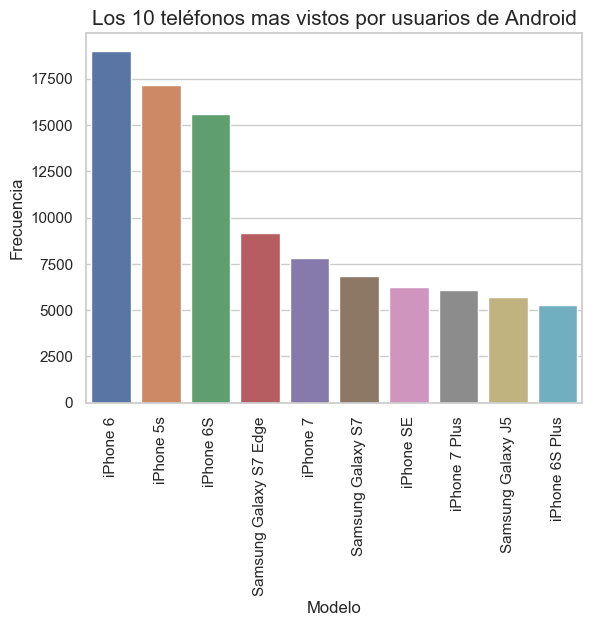

In [38]:
g = sns.barplot(x=top_10_models_viewed_android.index, y=top_10_models_viewed_android.values, orient = 'v')
plt.xticks(rotation=90)
g.set_title("Los 10 teléfonos mas vistos por usuarios de Android", fontsize = 15)
g.set_xlabel("Modelo", fontsize = 12)
g.set_ylabel("Frecuencia", fontsize = 12)

Obtenemos los modelos mas vistos por usuarios Android

In [39]:

df_android_conversion = df_android_full[df_android_full['event'] == 'conversion']
top_10_models_bought_android = df_android_conversion['model'].value_counts().head(10)
top_10_models_bought_android


iPhone 5s                            48
Samsung Galaxy J5                    45
iPhone 6                             38
Samsung Galaxy J7                    17
Samsung Galaxy Gran Prime Duos TV    17
Motorola Moto G4 Plus                16
Samsung Galaxy A5                    15
Samsung Galaxy S6 Flat               15
iPhone 5c                            15
Samsung Galaxy J7 Prime              14
Name: model, dtype: int64

Text(0,0.5,'Frecuencia')

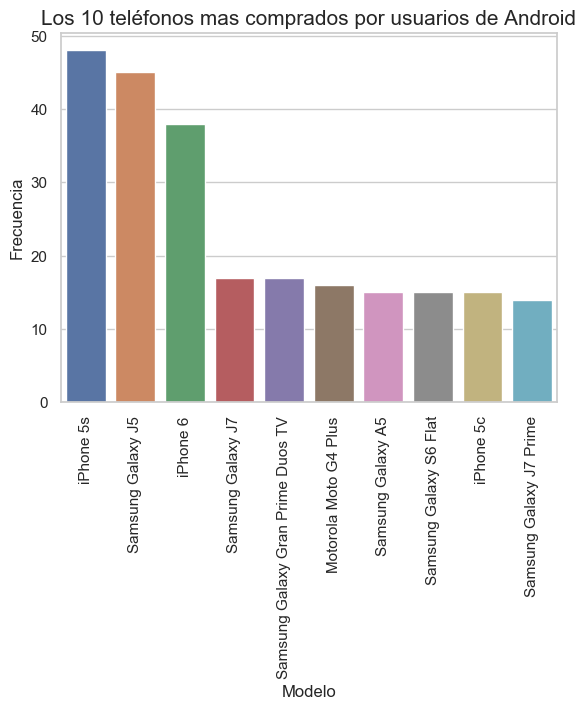

In [40]:
g = sns.barplot(x=top_10_models_bought_android.index, y=top_10_models_bought_android.values, orient = 'v')
plt.xticks(rotation=90)
g.set_title("Los 10 teléfonos mas comprados por usuarios de Android", fontsize = 15)
g.set_xlabel("Modelo", fontsize = 12)
g.set_ylabel("Frecuencia", fontsize = 12)

Vemos que estos usuarios tienen un aumento de los celulares android en los mas comprados 


## Windows

In [41]:
df_windows_full= df[df['person'].isin(df_windows['person'])]
df_windows_viewed = df_windows_full[df_windows_full['event'] == 'viewed product']
top_10_models_viewed_windows = df_windows_viewed['model'].value_counts().head(10)

Text(0,0.5,'Frecuencia')

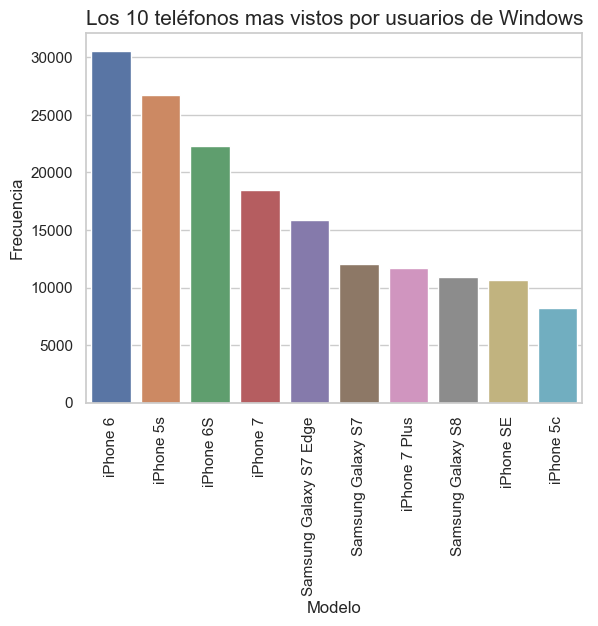

In [42]:
g = sns.barplot(x=top_10_models_viewed_windows.index, y=top_10_models_viewed_windows.values, orient = 'v')
plt.xticks(rotation=90)
g.set_title("Los 10 teléfonos mas vistos por usuarios de Windows", fontsize = 15)
g.set_xlabel("Modelo", fontsize = 12)
g.set_ylabel("Frecuencia", fontsize = 12)

Se ve que los usuarios de Windows tambien tienen una predisposicion por los telefonos Iphone

In [43]:
df_windows_conversion = df_windows_full[df_windows_full['event'] == 'conversion']
top_10_models_bought_windows = df_windows_conversion['model'].value_counts().head(10)
top_10_models_bought_windows


Samsung Galaxy J5         60
iPhone 5s                 43
iPhone 6                  40
iPhone 6S                 28
Samsung Galaxy S6 Flat    24
Motorola Moto G3 4G       24
iPhone 5c                 21
Motorola Moto G4 Plus     21
Samsung Galaxy Note 4     18
Samsung Galaxy J7         18
Name: model, dtype: int64

Text(0,0.5,'Frecuencia')

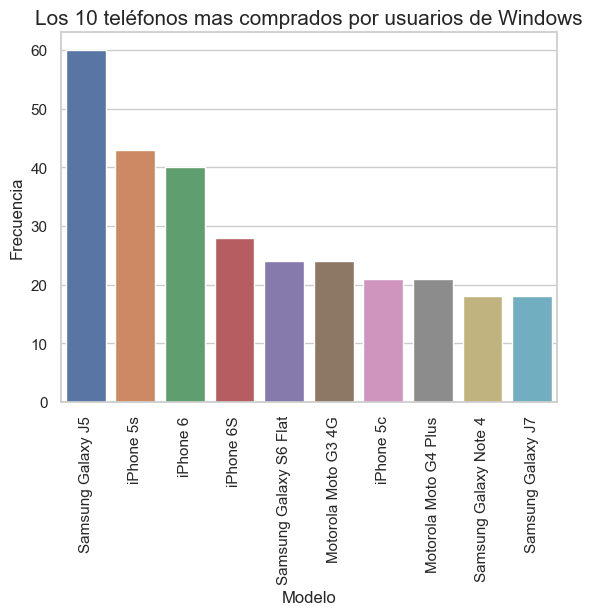

In [44]:
g = sns.barplot(x=top_10_models_bought_windows.index, y=top_10_models_bought_windows.values, orient = 'v')
plt.xticks(rotation=90)
g.set_title("Los 10 teléfonos mas comprados por usuarios de Windows", fontsize = 15)
g.set_xlabel("Modelo", fontsize = 12)
g.set_ylabel("Frecuencia", fontsize = 12)

Pero a la hora de comprar tambien se inclinan mas por los Android

## iOS

In [48]:
df_iOS_full= df[df['person'].isin(df_ios['person'])]
df_iOS_viewed = df_iOS_full[df_iOS_full['event'] == 'viewed product']
top_10_models_viewed_iOS = df_iOS_viewed['model'].value_counts().head(10)

Text(0,0.5,'Frecuencia')

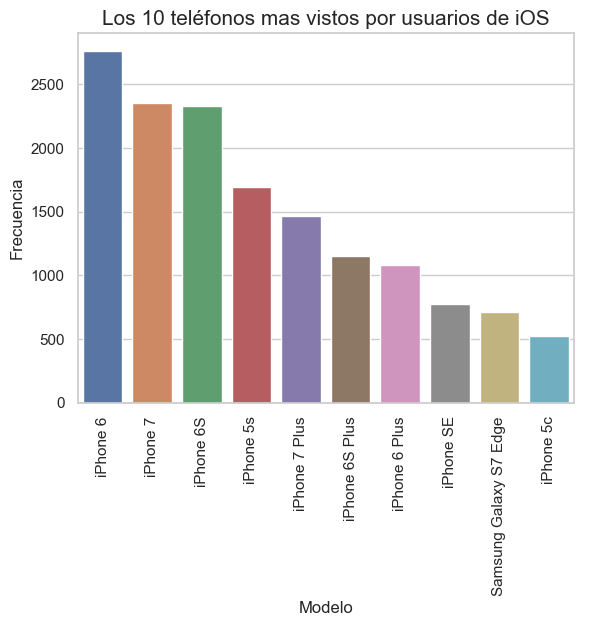

In [49]:
g = sns.barplot(x=top_10_models_viewed_iOS.index, y=top_10_models_viewed_iOS.values, orient = 'v')
plt.xticks(rotation=90)
g.set_title("Los 10 teléfonos mas vistos por usuarios de iOS", fontsize = 15)
g.set_xlabel("Modelo", fontsize = 12)
g.set_ylabel("Frecuencia", fontsize = 12)

Por interes realizamos este mismo analisis en los telefonos con iOS y vemos que la inclinacion por los Iphone es mayor

In [7]:
df_iOS_conversion = df_iOS_full[df_iOS_full['event'] == 'conversion']
top_10_models_bought_iOS = df_iOS_conversion['model'].value_counts().head(10)
top_10_models_bought_iOS


NameError: name 'df_iOS_full' is not defined

Text(0,0.5,'Frecuencia')

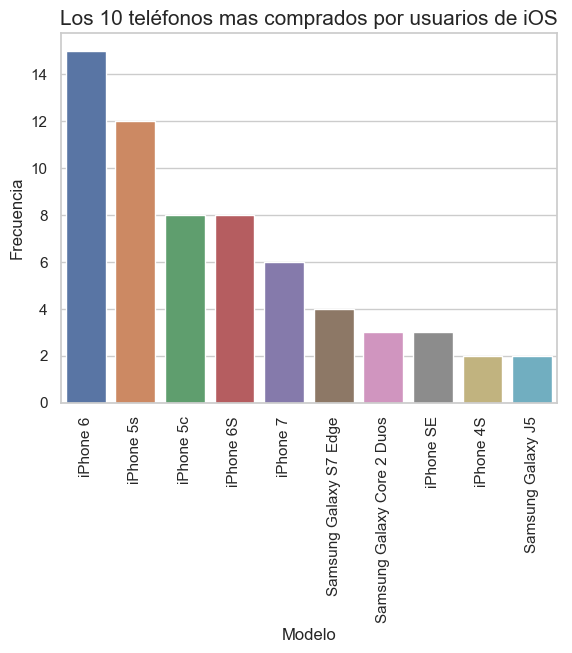

In [51]:
g = sns.barplot(x=top_10_models_bought_iOS.index, y=top_10_models_bought_iOS.values, orient = 'v')
plt.xticks(rotation=90)
g.set_title("Los 10 teléfonos mas comprados por usuarios de iOS", fontsize = 15)
g.set_xlabel("Modelo", fontsize = 12)
g.set_ylabel("Frecuencia", fontsize = 12)

Vemos que tambien realizan apariciones algunos android en los mas comprados por estos, pero en menor cantidad que en Windows y Android